In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [4]:
kickstarter_df = pd.read_csv('/Users/evelynjohnson/Desktop/METIS/Linear_Regression/Project/kickstarter_data.csv')

In [5]:
def find_num(string):
    num_list = [i for i in string if i.isnumeric()]
    if len(num_list) > 1:
        num_list = ''.join(num_list)
        num_list = num_list.replace(',', '')
    else:
        num_list = ''.join(num_list)
    return num_list

In [6]:
kickstarter_df['Funding'] = kickstarter_df.Funding.map(lambda x: int(find_num(x)))
kickstarter_df['Monetary Goal'] = kickstarter_df['Monetary Goal'].map(lambda x: int(find_num(x)))
kickstarter_df['Number of Backers'] = kickstarter_df['Number of Backers'].map(lambda x: int(find_num(x)))

In [7]:
kickstarter_df = kickstarter_df.rename(columns={'Unnamed: 0': 'Project Title'})

In [16]:
kickstarter_df[kickstarter_df['Project Title']=='Sauced: The Cookbook']

,Project Title,Funding,Category,Location,Project We Love Tag,Number of Backers,Monetary Goal,Number of Pledge-Reward Options,Number of Backers for Lowest Pledge,Number of Backers for Highest Pledge,Length of Funding Period,Video Present
1021,Sauced: The Cookbook,4388,Cookbooks,"Oceanside, CA",1,120,3480,9,0,2,30,0


In [7]:
def get_state(string):
    str_list = string.split(',')
    state = str_list[-1].strip(' ')
    return state

In [8]:
kickstarter_df['Location'] = kickstarter_df.Location.map(lambda x: get_state(x))

In [9]:
type(kickstarter_df['Location'][1])

str

# Preliminary EDA

In [10]:
kickstarter_df.shape

(1080, 12)

In [11]:
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Project Title                         1080 non-null   object
 1   Funding                               1080 non-null   int64 
 2   Category                              1080 non-null   object
 3   Location                              1080 non-null   object
 4   Project We Love Tag                   1080 non-null   int64 
 5   Number of Backers                     1080 non-null   int64 
 6   Monetary Goal                         1080 non-null   int64 
 7   Number of Pledge-Reward Options       1080 non-null   int64 
 8   Number of Backers for Lowest Pledge   1080 non-null   int64 
 9   Number of Backers for Highest Pledge  1080 non-null   int64 
 10  Length of Funding Period              1080 non-null   int64 
 11  Video Present                 

In [12]:
kickstarter_df.describe()

,Funding,Project We Love Tag,Number of Backers,Monetary Goal,Number of Pledge-Reward Options,Number of Backers for Lowest Pledge,Number of Backers for Highest Pledge,Length of Funding Period,Video Present
count,1.080000e+03,1080.000000,1080.000000,1080.000000,1080.000000,1.080000e+03,1.080000e+03,1080.000000,1080.000000
mean,5.643883e+04,0.237963,466.328704,9060.103704,8.932407,2.138310e+07,1.411717e+07,30.026852,0.646296
std,4.944302e+05,0.426034,2805.593814,33843.148203,6.219649,3.263988e+08,3.095999e+08,10.911227,0.478340
min,1.400000e+02,0.000000,2.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,2.799500e+03,0.000000,47.000000,1000.000000,5.000000,3.000000e+00,2.000000e+00,25.000000,0.000000
50%,7.502500e+03,0.000000,111.000000,3997.500000,8.000000,1.150000e+01,1.000000e+01,30.000000,1.000000
75%,2.077125e+04,0.000000,284.500000,10000.000000,11.000000,6.600000e+01,7.500000e+01,30.250000,1.000000
max,1.217965e+07,1.000000,81567.000000,750000.000000,64.000000,9.717292e+09,8.414591e+09,60.000000,1.000000


<AxesSubplot:>

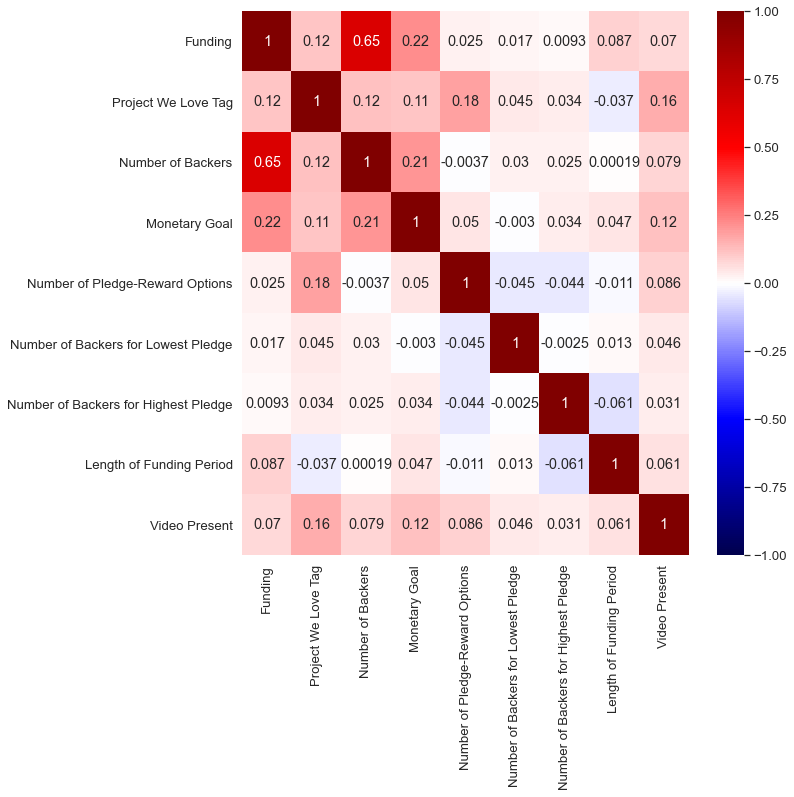

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(kickstarter_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# Data Cleaning

In [14]:
kickstarter_df['Category'].nunique()

117

In [15]:
categories = kickstarter_df['Category'].unique()
type(categories)
np.sort(categories);

In [16]:
category_dict = {'Art':['Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration', 'Installations', 'Mixed Media', 
                       'Painting', 'Performance Art', 'Public Art', 'Sculpture', 'Social Practice', 'Textiles', 
                        'Video Art'],
                'Comics':['Anthologies', 'Comic Books', 'Graphic Novels', 'Webcomics'],
                'Crafts': ['Candles', 'Crochet', 'DIY', 'Embroidery', 'Glass', 'Knitting', 'Pottery', 'Printing', 
                           'Quilts', 'Stationary', 'Taxidermy', 'Weaving', 'Woodworking'],
                'Dance': ['Performances', 'Residencies', 'Workshops'],
                'Design': ['Architecture', 'Civic Design', 'Graphic Design', 'Interactive Design', 'Product Design', 
                           'Toys', 'Typography'],
                'Fashion': ['Accessories', 'Apparel', 'Chidlrenswear', 'Couture', 'Footwear', 'Jewelry', 'Pet Fashion',
                           'Ready-to-wear'],
                'Film & Video': ['Action', 'Animation', 'Comedy', 'Documentary', 'Drama', 'Experimental', 'Family', 'Fantasy', 
                        'Festivals', 'Horror', 'Movie Theaters', 'Music Videos', 'Narrative Film', 'Romance', 
                         'Science Fiction', 'Shorts', 'Television', 'Thrillers', 'Webseries'],
                'Food': ['Bacon', 'Community Gardens', 'Cookbooks', 'Drinks', "Farmer's Markets", 'Farms', 
                         'Food Trucks', 'Restaurants', 'Small Batch', 'Vegan'],
                'Games': ['Gaming Hardware', 'Live Games', 'Mobile Games', 'Playing Cards', 'Puzzles', 'Tabletop Games', 
                'Video Games'],
                'Journalism': ['Audio', 'Photo', 'Print', 'Video', 'Web'],
                'Music': ['Blues', 'Chiptune', 'Classical Music', 'Country & Folk', 'Electronic Music', 
                          'Faith', 'Hip-Hop', 'Indie Rock', 'Jazz', 'Kids', 'Latin', 'Metal', 'Pop', 'Punk', 'R&B', 
                         'Rock', 'World Music'],
                'Photography': ['Animals', 'Fine Art', 'Nature', 'People', 'Photobooks', 'Places'],
                'Publishing': ['Academic', 'Anthologies', 'Art Books', 'Calendars', "Children's Books", 
                               'Fiction', 'Letterpress', 'Literary Journals', 'Literary Spaces', 'Nonfiction', 
                               'Periodicals', 'Poetry', 'Radio & Podcasts', 'Translations', 'Young Adult', 'Zines'],
                'Technology': ['3D Printing', 'Apps', 'Camera Equipment', 'DIY Electronics', 'Fabrication Tools', 
                               'Flight', 'Gadgets', 'Hardware', 'Makerspaces', 'Robots', 'Software', 'Sound',
                              'Space Exploration', 'Wearables'],
                'Theater': ['Experimental', 'Festivals', 'Immersive', 'Musical', 'Plays']}

In [17]:
kickstarter_df = kickstarter_df.replace(['Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration', 'Installations', 'Mixed Media', 
                       'Painting', 'Performance Art', 'Public Art', 'Sculpture', 'Social Practice', 'Textiles', 
                        'Video Art'], 'Art')
kickstarter_df = kickstarter_df.replace(['Anthologies', 'Comic Books', 'Graphic Novels', 'Webcomics'], 'Comics')
kickstarter_df = kickstarter_df.replace(['Candles', 'Crochet', 'DIY', 'Embroidery', 'Glass', 'Knitting', 'Pottery', 'Printing', 
                           'Quilts', 'Stationary', 'Taxidermy', 'Weaving', 'Woodworking'], 'Crafts')
kickstarter_df = kickstarter_df.replace(['Performances', 'Residencies', 'Workshops'], 'Dance')
kickstarter_df = kickstarter_df.replace(['Architecture', 'Civic Design', 'Graphic Design', 'Interactive Design', 'Product Design', 
                           'Toys', 'Typography'], 'Design')
kickstarter_df = kickstarter_df.replace(['Accessories', 'Apparel', 'Chidlrenswear', 'Couture', 'Footwear', 'Jewelry', 'Pet Fashion',
                           'Ready-to-wear'], 'Fashion')
kickstarter_df = kickstarter_df.replace(['Action', 'Animation', 'Comedy', 'Documentary', 'Drama', 'Experimental', 'Family', 'Fantasy', 
                        'Festivals', 'Horror', 'Movie Theaters', 'Music Videos', 'Narrative Film', 'Romance', 
                         'Science Fiction', 'Shorts', 'Television', 'Thrillers', 'Webseries'], 'Film & Video')
kickstarter_df = kickstarter_df.replace(['Bacon', 'Community Gardens', 'Cookbooks', 'Drinks', "Farmer's Markets", 'Farms', 
                         'Food Trucks', 'Restaurants', 'Small Batch', 'Vegan'], 'Food')
kickstarter_df = kickstarter_df.replace(['Gaming Hardware', 'Live Games', 'Mobile Games', 'Playing Cards', 'Puzzles', 'Tabletop Games', 
                'Video Games'], 'Games')
kickstarter_df = kickstarter_df.replace(['Audio', 'Photo', 'Print', 'Video', 'Web'], 'Journalism')
kickstarter_df = kickstarter_df.replace(['Blues', 'Chiptune', 'Classical Music', 'Country & Folk', 'Electronic Music', 
                          'Faith', 'Hip-Hop', 'Indie Rock', 'Jazz', 'Kids', 'Latin', 'Metal', 'Pop', 'Punk', 'R&B', 
                         'Rock', 'World Music'], 'Music')
kickstarter_df = kickstarter_df.replace(['Animals', 'Fine Art', 'Nature', 'People', 'Photobooks', 'Places'], 'Photography')
kickstarter_df = kickstarter_df.replace(['Academic', 'Anthologies', 'Art Books', 'Calendars', "Children's Books", 
                               'Fiction', 'Letterpress', 'Literary Journals', 'Literary Spaces', 'Nonfiction', 
                               'Periodicals', 'Poetry', 'Radio & Podcasts', 'Translations', 'Young Adult', 'Zines'], 
                                       'Publishing')
kickstarter_df = kickstarter_df.replace(['3D Printing', 'Apps', 'Camera Equipment', 'DIY Electronics', 'Fabrication Tools', 
                               'Flight', 'Gadgets', 'Hardware', 'Makerspaces', 'Robots', 'Software', 'Sound',
                              'Space Exploration', 'Wearables'], 'Technology')
kickstarter_df = kickstarter_df.replace(['Experimental', 'Festivals', 'Immersive', 'Musical', 'Plays'], 'Theater')

In [18]:
kickstarter_df.head();

In [19]:
events = kickstarter_df.loc[kickstarter_df['Category']=='Events']
events

,Project Title,Funding,Category,Location,Project We Love Tag,Number of Backers,Monetary Goal,Number of Pledge-Reward Options,Number of Backers for Lowest Pledge,Number of Backers for Highest Pledge,Length of Funding Period,Video Present
829,Mandy & Trizia Pin-up Comic Book,41462,Events,OR,0,587,2500,33,133,1,30,0
963,The Utah Valley Food Fest 2021,2758,Events,UT,0,111,2500,8,7,1,19,0


In [20]:
kickstarter_df[kickstarter_df['Project Title']=='Mandy & Trizia Pin-up Comic Book'] = kickstarter_df.loc[kickstarter_df['Project Title']=='Mandy & Trizia Pin-up Comic Book'].replace('Events','Comics')
kickstarter_df[kickstarter_df['Project Title']=='The Utah Valley Food Fest 2021'] = kickstarter_df.loc[kickstarter_df['Project Title']=='The Utah Valley Food Fest 2021'].replace('Events','Food')


In [21]:
spaces = kickstarter_df.loc[kickstarter_df['Category']=='Spaces']
spaces

,Project Title,Funding,Category,Location,Project We Love Tag,Number of Backers,Monetary Goal,Number of Pledge-Reward Options,Number of Backers for Lowest Pledge,Number of Backers for Highest Pledge,Length of Funding Period,Video Present
426,Fresh Coast Dance: Movement and Community,10121,Spaces,WI,0,106,10000,12,5,22,40,0
475,land to sea,35510,Spaces,NY,1,179,35000,7,9,5,30,1


In [22]:
kickstarter_df[kickstarter_df['Project Title']=='Fresh Coast Dance: Movement and Community'] = kickstarter_df.loc[kickstarter_df['Project Title']=='Fresh Coast Dance: Movement and Community'].replace('Spaces','Dance')
kickstarter_df[kickstarter_df['Project Title']=='land to sea'] = kickstarter_df.loc[kickstarter_df['Project Title']=='land to sea'].replace('Spaces','Food')


In [23]:
kickstarter_df.loc[kickstarter_df['Category']=='Film & Video'];

In [24]:
kickstarter_df[kickstarter_df['Category']=='Film'] = kickstarter_df.loc[kickstarter_df['Category']=='Film'].replace('Film','Film & Video')


In [25]:
kickstarter_df.Location.unique();

In [26]:
northeast = ['ME', 'NH', 'MA', 'RI', 'CT', 'VT', 'NY', 'PA', 'NJ']
southeast = ['WV', 'MD', 'DE', 'VA', 'DC', 'KY', 'NC', 'SC', 'GA', 'TN', 'AR', 'LA','MS', 'AL', 'FL']
southwest = ['OK', 'TX', 'NM', 'AZ']
midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
west = ['MT', 'WY', 'CO', 'ID', 'UT', 'WA', 'OR', 'NV', 'CA', 'AK', 'HI']
regions = [northeast, southeast, southwest, midwest, west]

In [27]:
kickstarter_df = kickstarter_df.replace(['ME', 'NH', 'MA', 'RI', 'CT', 'VT', 'NY', 'PA', 'NJ'], 'Northeast')
kickstarter_df = kickstarter_df.replace(['WV', 'MD', 'DE', 'VA', 'DC', 'KY', 'NC', 'SC', 'GA', 'TN', 'AR', 'LA','MS', 'AL', 'FL'], 'Southeast')
kickstarter_df = kickstarter_df.replace(['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'], 'Midwest')
kickstarter_df = kickstarter_df.replace(['MT', 'WY', 'CO', 'ID', 'UT', 'WA', 'OR', 'NV', 'CA', 'AK', 'HI'], 'West')
kickstarter_df = kickstarter_df.replace(['OK', 'TX', 'NM', 'AZ'], 'Southwest')

In [28]:
kickstarter_df.Location.unique()

array(['Northeast', 'West', 'Midwest', 'Southeast', 'Southwest'],
      dtype=object)

# Creating Dummy Variables

In [29]:
location_dummies = pd.get_dummies(kickstarter_df['Location'], drop_first=True)
location_dummies #dropped Midwest

,Northeast,Southeast,Southwest,West
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1075,0,0,0,0
1076,1,0,0,0
1077,0,0,0,0
1078,0,1,0,0


In [30]:
category_dummies = pd.get_dummies(kickstarter_df['Category'], drop_first=True)
category_dummies #dropped Art

,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1076,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1077,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1078,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
numerical_kickstarter_df = kickstarter_df.drop(['Location', 'Category'], axis=1)
dummies_and_data_df = pd.concat([numerical_kickstarter_df, location_dummies, category_dummies], axis=1)

In [40]:
dummies_and_data_df.keys()

Index(['Project Title', 'Funding', 'Project We Love Tag', 'Number of Backers',
       'Monetary Goal', 'Number of Pledge-Reward Options',
       'Number of Backers for Lowest Pledge',
       'Number of Backers for Highest Pledge', 'Length of Funding Period',
       'Video Present', 'Northeast', 'Southeast', 'Southwest', 'West',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'],
      dtype='object')

In [42]:
kickstarter_df.isnull().sum()

Project Title                           0
Funding                                 0
Category                                0
Location                                0
Project We Love Tag                     0
Number of Backers                       0
Monetary Goal                           0
Number of Pledge-Reward Options         0
Number of Backers for Lowest Pledge     0
Number of Backers for Highest Pledge    0
Length of Funding Period                0
Video Present                           0
dtype: int64

In [45]:
location_df = pd.concat([kickstarter_df['Funding'], location_dummies], axis=1)
location_df

,Funding,Northeast,Southeast,Southwest,West
0,1329,1,0,0,0
1,5546,1,0,0,0
2,1835,0,0,0,1
3,5989,0,0,0,0
4,30638,0,0,0,0
...,...,...,...,...,...
1075,454605,0,0,0,0
1076,1702,1,0,0,0
1077,17418,0,0,0,0
1078,1702,0,1,0,0


<AxesSubplot:>

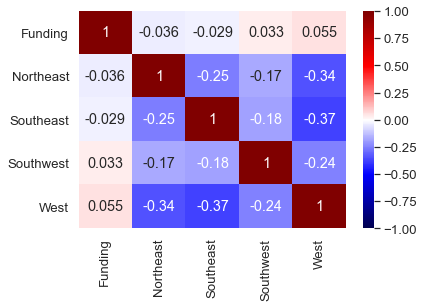

In [47]:
sns.heatmap(location_df.corr(), annot=True, cmap="seismic", vmin=-1, vmax=1)

In [58]:
category_df = pd.concat([kickstarter_df['Funding'], category_dummies], axis=1)
category_df

,Funding,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,1329,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5546,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1835,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5989,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,30638,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,454605,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1076,1702,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1077,17418,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1078,1702,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

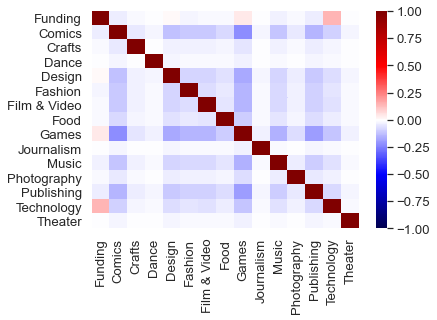

In [59]:
sns.heatmap(category_df.corr(), cmap="seismic", vmin=-1, vmax=1)

In [60]:
category_df.corr()

,Funding,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
Funding,1.000000,-0.031977,-0.010342,-0.005226,0.014063,-0.022250,-0.010633,-0.015111,0.045412,-0.004058,-0.025047,-0.010306,-0.032622,0.148386,-0.001287
Comics,-0.031977,1.000000,-0.039424,-0.021523,-0.124443,-0.104879,-0.107360,-0.073524,-0.223813,-0.021523,-0.112201,-0.046735,-0.144182,-0.086015,-0.021523
Crafts,-0.010342,-0.039424,1.000000,-0.005102,-0.029500,-0.024862,-0.025451,-0.017429,-0.053057,-0.005102,-0.026598,-0.011079,-0.034179,-0.020390,-0.005102
Dance,-0.005226,-0.021523,-0.005102,1.000000,-0.016105,-0.013573,-0.013894,-0.009515,-0.028966,-0.002786,-0.014521,-0.006048,-0.018660,-0.011132,-0.002786
Design,0.014063,-0.124443,-0.029500,-0.016105,1.000000,-0.078478,-0.080335,-0.055016,-0.167474,-0.016105,-0.083957,-0.034970,-0.107887,-0.064363,-0.016105
Fashion,-0.022250,-0.104879,-0.024862,-0.013573,-0.078478,1.000000,-0.067705,-0.046367,-0.141144,-0.013573,-0.070758,-0.029473,-0.090926,-0.054244,-0.013573
Film & Video,-0.010633,-0.107360,-0.025451,-0.013894,-0.080335,-0.067705,1.000000,-0.047464,-0.144484,-0.013894,-0.072432,-0.030170,-0.093077,-0.055527,-0.013894
Food,-0.015111,-0.073524,-0.017429,-0.009515,-0.055016,-0.046367,-0.047464,1.000000,-0.098947,-0.009515,-0.049604,-0.020661,-0.063742,-0.038027,-0.009515
Games,0.045412,-0.223813,-0.053057,-0.028966,-0.167474,-0.141144,-0.144484,-0.098947,1.000000,-0.028966,-0.150998,-0.062895,-0.194038,-0.115758,-0.028966
Journalism,-0.004058,-0.021523,-0.005102,-0.002786,-0.016105,-0.013573,-0.013894,-0.009515,-0.028966,1.000000,-0.014521,-0.006048,-0.018660,-0.011132,-0.002786


In [52]:
final_data = dummies_and_data_df.to_csv('Final_Data.csv')